# Lateral diffusion

## Imports

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Data

In [2]:
model = xr.open_dataset("../data/processed/model.nc")
model

<xarray.Dataset>
Dimensions:  (month: 12, lat: 180, lon: 360)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    sst      (month, lat, lon) float32 ...
    sss      (month, lat, lon) float32 ...
    mld      (month, lat, lon) float32 ...
Attributes:
    regrid_method:  bilinear

In [3]:
obs = xr.open_dataset("../data/processed/combined_observations.nc")
obs

<xarray.Dataset>
Dimensions:  (lat: 180, month: 12, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    sst      (month, lat, lon) float32 ...
    sss      (month, lat, lon) float32 ...
    mld      (month, lat, lon) float32 ...

In [4]:
eke = xr.open_dataset("dt_global_twosat_phy_l4_202307_vDT2021-M01.nc")
eke

<xarray.Dataset>
Dimensions:           (time: 1, nv: 2, latitude: 720, longitude: 1440)
Coordinates:
  * time              (time) datetime64[ns] 2023-07-15
  * latitude          (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.6 359.9
  * nv                (nv) int32 0 1
Data variables:
    crs               int32 ...
    climatology_bnds  (time, nv) datetime64[ns] ...
    lat_bnds          (latitude, nv) float32 ...
    lon_bnds          (longitude, nv) float32 ...
    sla               (time, latitude, longitude) float64 ...
    eke               (time, latitude, longitude) float64 ...
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         Delayed Time Level-4 monthly means of Se...
    time_coverage_duration:          P1M
    time_coverage_end:               2023-07-31T00:00:00Z
    time_coverage_resolution:        P1M
    time_coverage_start:             2023-07-01T00:00:00Z
    title:                           DT merged two-satellite Global Ocean L4 ...

In [5]:
target_lat = np.linspace(-89.5, 89.5, 180)
target_lon = np.linspace(0.5, 359.5, 360)

eke = eke.sel(
    latitude=target_lat, longitude=target_lon, method="nearest"
).assign_coords(
    latitude=target_lat, longitude=target_lon
).rename(
    {'latitude': 'lat', 'longitude': 'lon'}
)["eke"]
eke

<xarray.DataArray 'eke' (time: 1, lat: 180, lon: 360)>
[64800 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2023-07-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    cell_methods:   time: mean within years
    grid_mapping:   crs
    long_name:      Averaged Eddy Kinetic Energy 2023/07
    standard_name:  specific_kinetic_energy_of_sea_water
    units:          cm2/s2

## Eddy errors

Results for EKE threshold: 1000


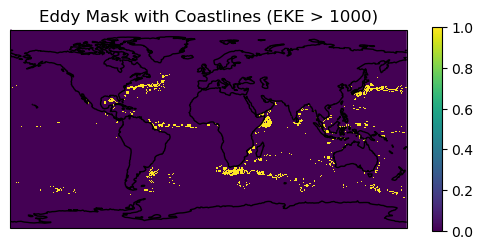

----------------------------------------
Configuration 00:
  RMSE in eddy regions:     1.222
  RMSE in non-eddy regions: 0.742
----------------------------------------
----------------------------------------
Configuration 08:
  RMSE in eddy regions:     1.275
  RMSE in non-eddy regions: 0.738
----------------------------------------
----------------------------------------
Configuration 09:
  RMSE in eddy regions:     1.310
  RMSE in non-eddy regions: 0.749
----------------------------------------
----------------------------------------
Configuration 10:
  RMSE in eddy regions:     1.284
  RMSE in non-eddy regions: 0.741
----------------------------------------
----------------------------------------
Configuration 12:
  RMSE in eddy regions:     1.272
  RMSE in non-eddy regions: 0.743
----------------------------------------


Results for EKE threshold: 2500


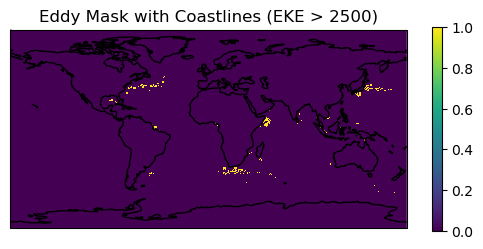

----------------------------------------
Configuration 00:
  RMSE in eddy regions:     1.457
  RMSE in non-eddy regions: 0.752
----------------------------------------
----------------------------------------
Configuration 08:
  RMSE in eddy regions:     1.538
  RMSE in non-eddy regions: 0.750
----------------------------------------
----------------------------------------
Configuration 09:
  RMSE in eddy regions:     1.587
  RMSE in non-eddy regions: 0.762
----------------------------------------
----------------------------------------
Configuration 10:
  RMSE in eddy regions:     1.544
  RMSE in non-eddy regions: 0.753
----------------------------------------
----------------------------------------
Configuration 12:
  RMSE in eddy regions:     1.529
  RMSE in non-eddy regions: 0.754
----------------------------------------


Results for EKE threshold: 5000


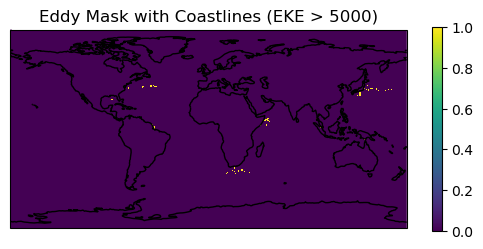

----------------------------------------
Configuration 00:
  RMSE in eddy regions:     1.366
  RMSE in non-eddy regions: 0.757
----------------------------------------
----------------------------------------
Configuration 08:
  RMSE in eddy regions:     1.449
  RMSE in non-eddy regions: 0.755
----------------------------------------
----------------------------------------
Configuration 09:
  RMSE in eddy regions:     1.476
  RMSE in non-eddy regions: 0.767
----------------------------------------
----------------------------------------
Configuration 10:
  RMSE in eddy regions:     1.425
  RMSE in non-eddy regions: 0.759
----------------------------------------
----------------------------------------
Configuration 12:
  RMSE in eddy regions:     1.413
  RMSE in non-eddy regions: 0.760
----------------------------------------




In [29]:
# List of EKE thresholds for defining "eddy" regions
eke_thresholds = [1000, 2500, 5000]  

for eke_thr in eke_thresholds:
    print("="*50)
    print(f"Results for EKE threshold: {eke_thr}")
    print("="*50)
    
    # 1. Make eddy mask for this threshold
    eddy_mask = eke > eke_thr
    
    # 2. Plot mask (optional: remove if running in headless mode)
    proj = ccrs.PlateCarree()
    fig, ax = plt.subplots(subplot_kw={'projection': proj})
    im = eddy_mask.plot(ax=ax, transform=proj, cmap='viridis', add_colorbar=False)
    ax.coastlines()
    plt.colorbar(im, ax=ax, shrink=0.55)
    plt.title(f"Eddy Mask with Coastlines (EKE > {eke_thr})")
    plt.show()
    
    # 3. RMSE for each configuration
    for cfg in ["00", "08", "09", "10", "12"]:
        ds = xr.open_dataset(f"../data/processed/nemo{cfg}.nc")
        error = ds["sst"] - obs["sst"]

        rmse_eddy = np.sqrt((error.where(eddy_mask)**2).mean())
        rmse_no_eddy = np.sqrt((error.where(~eddy_mask)**2).mean())

        print("-"*40)
        print(f"Configuration {cfg}:")
        print(f"  RMSE in eddy regions:     {rmse_eddy.values:.3f}")
        print(f"  RMSE in non-eddy regions: {rmse_no_eddy.values:.3f}")
        print("-"*40)
        ds.close()
    print("\n")